## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
boston = pd.read_csv("boston.txt", sep="\s+", header=None)
even_lines = boston.loc[boston.index % 2 == 0].reset_index(drop=True)
odd_lines = boston.loc[boston.index % 2 == 1].drop([3, 4, 5, 6, 7, 8, 9, 10], axis=1).reset_index(drop=True)
boston = even_lines.merge(odd_lines, how="left", left_index=True, right_index=True)
boston.columns = columns

X = pd.DataFrame(boston, columns = columns[:-1])
y = pd.DataFrame(boston, columns = ['MEDV'])

In [3]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2360873)

In [6]:
regr_1 = DecisionTreeRegressor(max_depth=8)
regr_2 = DecisionTreeRegressor(max_depth=2)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

In [7]:
mse1 = mean_squared_error(y_train, regr_1.predict(X_train))
mse2 = mean_squared_error(y_train, regr_2.predict(X_train))
r2_1 = regr_1.score(X_train, y_train)
r2_2 = regr_2.score(X_train, y_train)

template = "O MSE da árvore com profundidade={0} é: {1:.2f}"
template1 = "O R2 da árvore com profundidade={0} é: {1:.2f}"

print(template.format(regr_1.get_depth(),mse1).replace(".",","))
print(template.format(regr_2.get_depth(),mse2).replace(".",","))
print(template1.format(regr_1.get_depth(),r2_1).replace(".",","))
print(template1.format(regr_2.get_depth(),r2_2).replace(".",","))

O MSE da árvore com profundidade=8 é: 1,80
O MSE da árvore com profundidade=2 é: 25,85
O R2 da árvore com profundidade=8 é: 0,98
O R2 da árvore com profundidade=2 é: 0,71


### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

n_minimo,2,3,4,5,6,7,8,9
profundidade,,,,,,,,
2,25.849251,25.849251,25.849251,25.849251,25.849251,25.849251,25.849251,25.849251
3,16.379967,16.488905,16.560045,16.696402,17.087811,17.521735,17.521735,17.521735
4,10.694020,11.672280,11.594380,12.370515,13.603473,14.272505,14.512649,14.512649
5,7.959347,9.094435,9.168447,10.180524,11.623530,12.545198,12.785342,12.855279
6,5.790651,7.284294,7.506069,8.969125,10.607168,11.549900,11.853203,11.936124
7,4.381083,6.364630,6.696155,8.236959,9.899904,10.876403,11.257219,11.440657
8,3.630367,5.637695,6.095808,7.623958,9.352397,10.279992,10.895169,11.123342


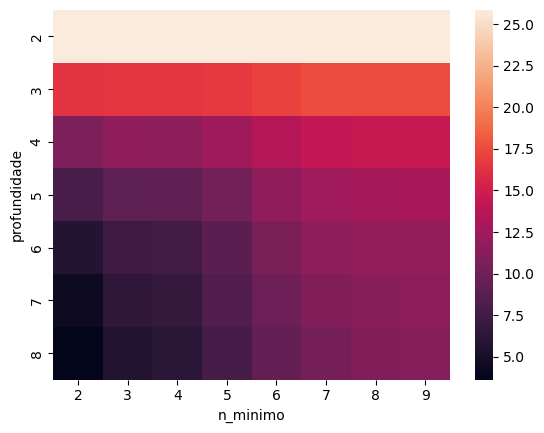

In [8]:
mses = []
ind_i = []
ind_j = []

for i in range(2, 9):
    for j in range(2, 10):
        regr_1 = DecisionTreeRegressor(max_depth=i, min_samples_leaf=j)
        regr_1.fit(X_train, y_train)
        mse1 = mean_squared_error(y_train, regr_1.predict(X_train))
        mses.append(mse1)
        ind_i.append(i)
        ind_j.append(j)
        
df_mse = pd.DataFrame({'mses':mses, 'profundidade':ind_i, 'n_minimo':ind_j})
sns.heatmap(df_mse.pivot(index='profundidade', columns='n_minimo', values='mses'))
df_mse.pivot(index='profundidade', columns='n_minimo', values='mses')

In [9]:
path = regr_1.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.00000000e+00, 2.60760230e-02, 4.24116628e-02, 4.64417640e-02,
        6.06139108e-02, 9.33006812e-02, 1.08039463e-01, 1.15017661e-01,
        1.15206747e-01, 1.65819797e-01, 1.70190045e-01, 1.71920185e-01,
        3.06995609e-01, 4.00081328e-01, 4.47497801e-01, 5.02500496e-01,
        5.47321975e-01, 5.65970286e-01, 5.74680079e-01, 6.84263688e-01,
        6.98850746e-01, 1.19694341e+00, 2.78056299e+00, 4.52477476e+00,
        5.28170375e+00, 1.70606107e+01, 4.16718568e+01]),
 'impurities': array([11.12334239, 11.14941841, 11.19183007, 11.23827184, 11.29888575,
        11.48548711, 11.59352658, 11.70854424, 11.93895773, 12.10477753,
        12.27496757, 12.61880794, 12.92580355, 13.32588488, 13.77338268,
        14.27588317, 14.82320515, 15.38917544, 15.96385551, 16.6481192 ,
        17.34696995, 18.54391335, 21.32447635, 25.84925111, 31.13095486,
        48.19156561, 89.86342242])}

Text(0, 0.5, 'Impureza total das folhas')

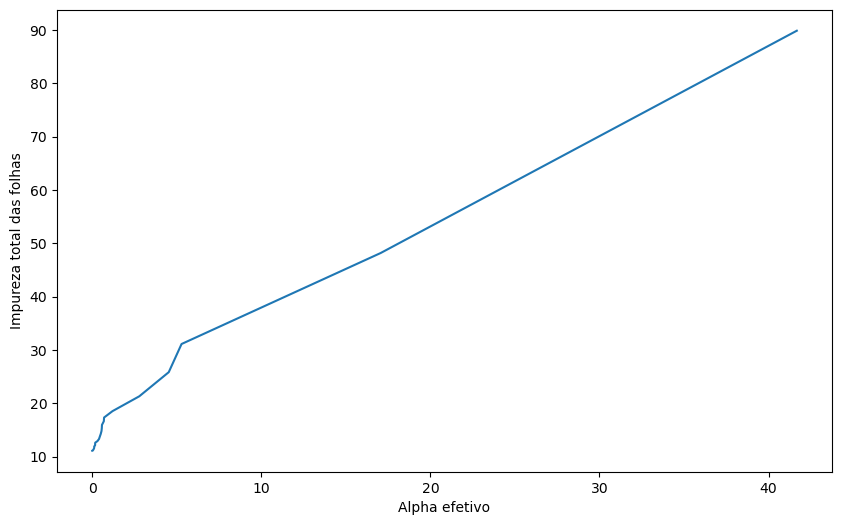

In [10]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza total das folhas")

### 3. Para cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [11]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

Text(0, 0.5, 'Profundidade da árvore')

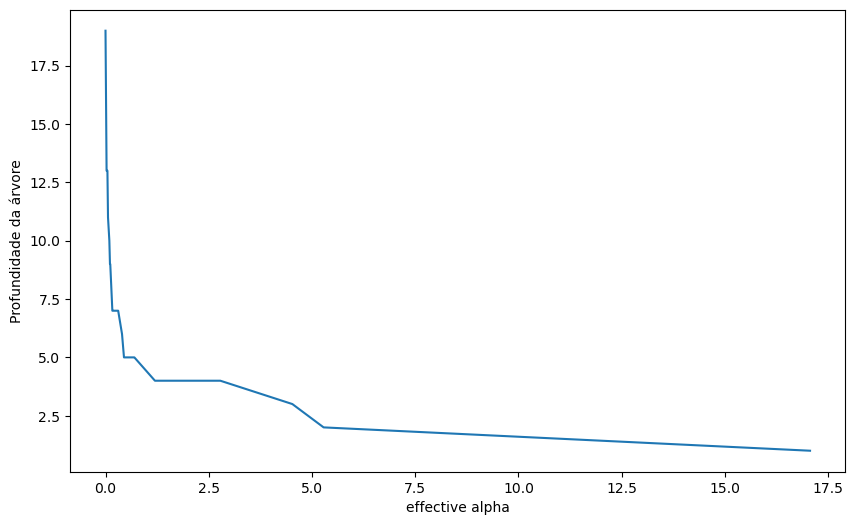

In [12]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Profundidade da árvore")

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [13]:
train_scores = [mean_squared_error(y_train , clf.predict(X_train)) for clf in clfs]
test_scores  = [mean_squared_error(y_test  , clf.predict(X_test )) for clf in clfs]

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

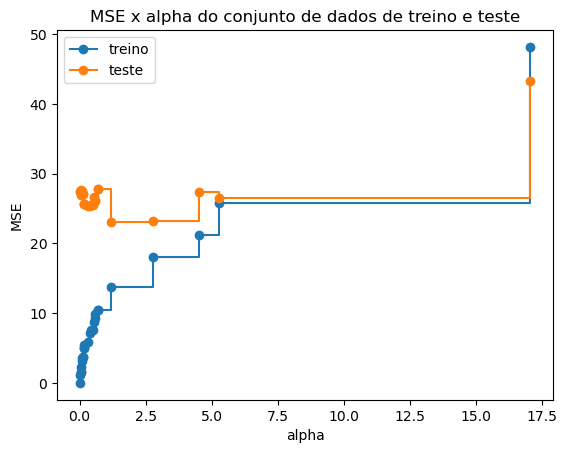

In [14]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [15]:
# Escolher o valor de alpha com o menor MSE para a base de teste
best_alpha = ccp_alphas[np.argmin(test_scores)]
print(f"Melhor valor de alpha: {best_alpha}")

Melhor valor de alpha: 1.196943405176146


### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [16]:
# Criar e ajustar a árvore de regressão com o melhor alpha
arvore_final = DecisionTreeRegressor(ccp_alpha=best_alpha)
arvore_final.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=1.196943405176146)

In [17]:
# Calcular o R-quadrado
print(f"Profundidade: {arvore_final.tree_.max_depth}")
print(f"MSE na base de testes: {mean_squared_error(y_test, arvore_final.predict(X_test)):.2f}")
print(f"R_quadrado na base de testes: {arvore_final.score(X_test, y_test):.2f}")

Profundidade: 4
MSE na base de testes: 23.02
R_quadrado na base de testes: 0.66


### 7. Visualize esta árvore.

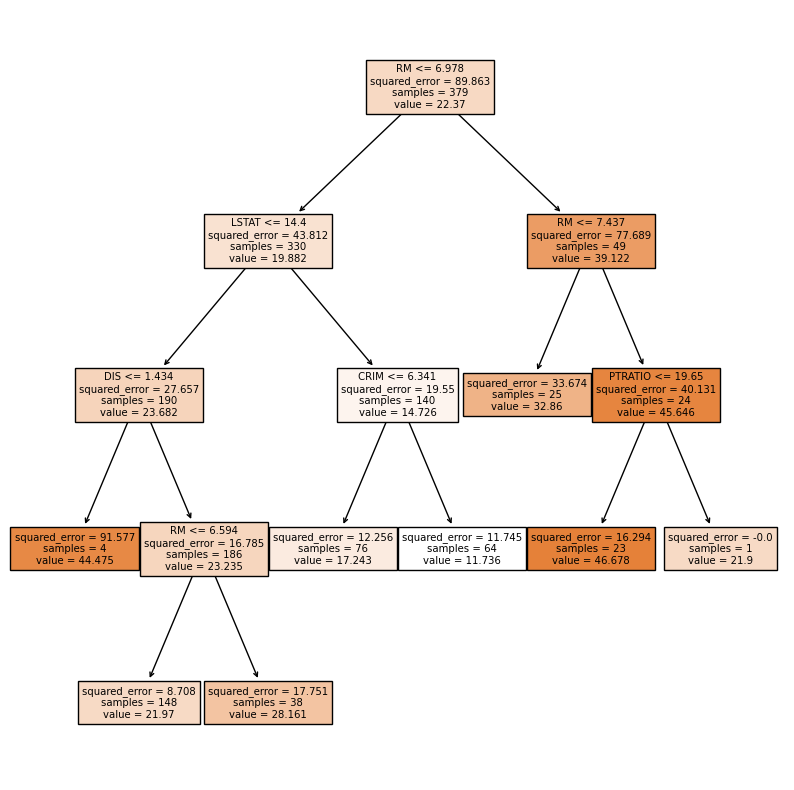

In [18]:
# Plotar a árvore
plt.rc('figure', figsize=(10, 10))
tp = tree.plot_tree(arvore_final, 
                    feature_names=X.columns,  
                    filled=True) 